In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

class trial:
    
    def __init__(self,N):
        self.n = N
       
        
    def control_sim(self):
        '''
        This method will perform a simulation of infection outcomes, either infected
        or not in the control group. Probability of being infected following exposure is 
        0.5 for this group, the untreated pigs. 'n' means not infected, and 'i' means
        infected.
        '''
        controls=[]
        for i in range(self.n):           
            x = random.randint(0,1)
            if x == 1:
                y = 1
                controls.append(y)
            else:
                y = 0
                controls.append(y)
        return np.array(controls)
    
    def treatment_sim(self):
        '''
        This method will perform a simulation of infection outcomes, either infected
        or not in the treatment group. Probability of being infected following exposure is 
        0.1 for this group, the treated pigs. 'n' means not infected, and 'i' means
        infected.
        '''
        treatments = []
        for i in range(self.n):
            x=random.random()
            if x < 0.1:
                y=0
                treatments.append(y)
            else:
                y=1
                treatments.append(y)
        return np.array(treatments)
            

In [4]:
print(trial(5).control_sim())
print(trial(5).treatment_sim())

[0 0 0 0 1]
[1 0 1 1 1]


In [6]:
class permutation_test:
    def __init__(self, group1, group2):
        '''
        Set the sizes of the groups bases on the sample sizes.
        '''
        self.n_1 = group1.size
        self.n_2 = group2.size
        self.n_all = self.n_1 + self.n_2
        self.all = np.concatenate((group1, group2), axis=0)
    
    def shuffle_groups(self):
        '''
        When all the data is concatenated, it is indexed based on the control and treatment groups.
        '''
        temp = self.all.copy()
        np.random.shuffle(temp)
        go = temp[:self.n_1]
        gt = temp[self.n_2:]
        return(go,gt)
    
    def generate(self):
        '''
        Performs the permutation per test
        '''
        rounds = 5000 #10000 permutations per test, with each test needing an observed statistic
        rand_stats = np.zeros(rounds) #permutation data        
        for i in range(rounds):
            go, gt = self.shuffle_groups()
            rand_stats[i] = abs(go.mean() - gt.mean())
        
        return  rand_stats  #returning mean difference per permutation

In [7]:
def n_values(samp_size):
    '''
    This calculates the p-values based on the sample sizes, and returns the probability of a statistically significant 
    difference with the sample size as a tuple.  The data for different N values is plotted below.
    '''
    obs_stat_list = [] #observed statitics from each permutation test
    total_perm_list = [] #permutation data from all 50 tests(list of 50 arrays, each array having 10000 values)
    p_value_list = []
    
    x = trial(samp_size) #from trial class
    for i in range(50): #for each of the 50 permutation TESTS!!!!  
        #simulating control and treatment groups for observed value(happens for each of the 50 permutation tests)
        control = x.control_sim() #generating control group
        treatment = x.treatment_sim() #generating treatment group

        obs_stat = abs(control.mean() - treatment.mean()) #calculating observed statistic
        obs_stat_list.append(obs_stat)

        permutation = permutation_test(control, treatment)
        perm = permutation.generate()
        total_perm_list.append(perm)
        #print(obs_stat)

    #p-values
    j = 0
    for i in np.array(total_perm_list): #i = random stats from each perm test
        #print(i)
        p_value = np.sum(i >= obs_stat_list[j]) / i.size
        p_value_list.append(p_value)
        j += 1
    
    #probability of statistically significant difference
    stat_sig = 0
    for pval in p_value_list:
        if pval < 0.05:
            stat_sig += 1
    prob_sig_val = stat_sig/len(p_value_list)
    
    return ((samp_size, prob_sig_val))
    #n_values.append((samp_size, prob_sigval))
    

In [8]:
n_values_list = []
for i in range(1,31):
    #print(i)
    n_values_list.append(n_values(i))

print(n_values_list)

KeyboardInterrupt: 

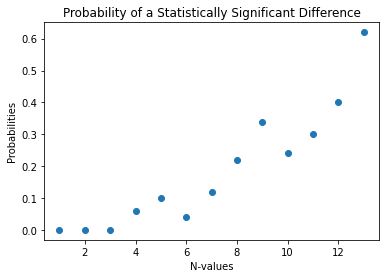

In [11]:
x_val = [x[0] for x in n_values_list]
y_val = [x[1] for x in n_values_list]

plt.xlabel('N-values')
plt.ylabel('Probabilities')
plt.title('Probability of a Statistically Significant Difference')
plt.scatter(x_val,y_val)
plt.show()

In [63]:
for i in range(20):
    print(n_values(30)[1])
    

0.84
0.88
0.88
0.88
0.84
0.88
0.96
0.96
0.92
0.94
0.96
0.92
0.94
0.96
0.9
0.86
0.92
0.92
0.94
0.92


30 seems to be a good value for N when looking for around 90% chance to pass the statistical test.